In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Datasets/heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.shape

(1025, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

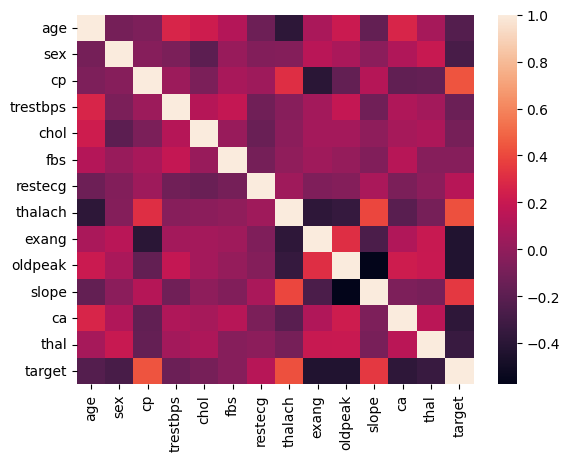

In [10]:
sns.heatmap(df.corr())

In [11]:
len(df.columns)

14

## Histogram for all tha columns

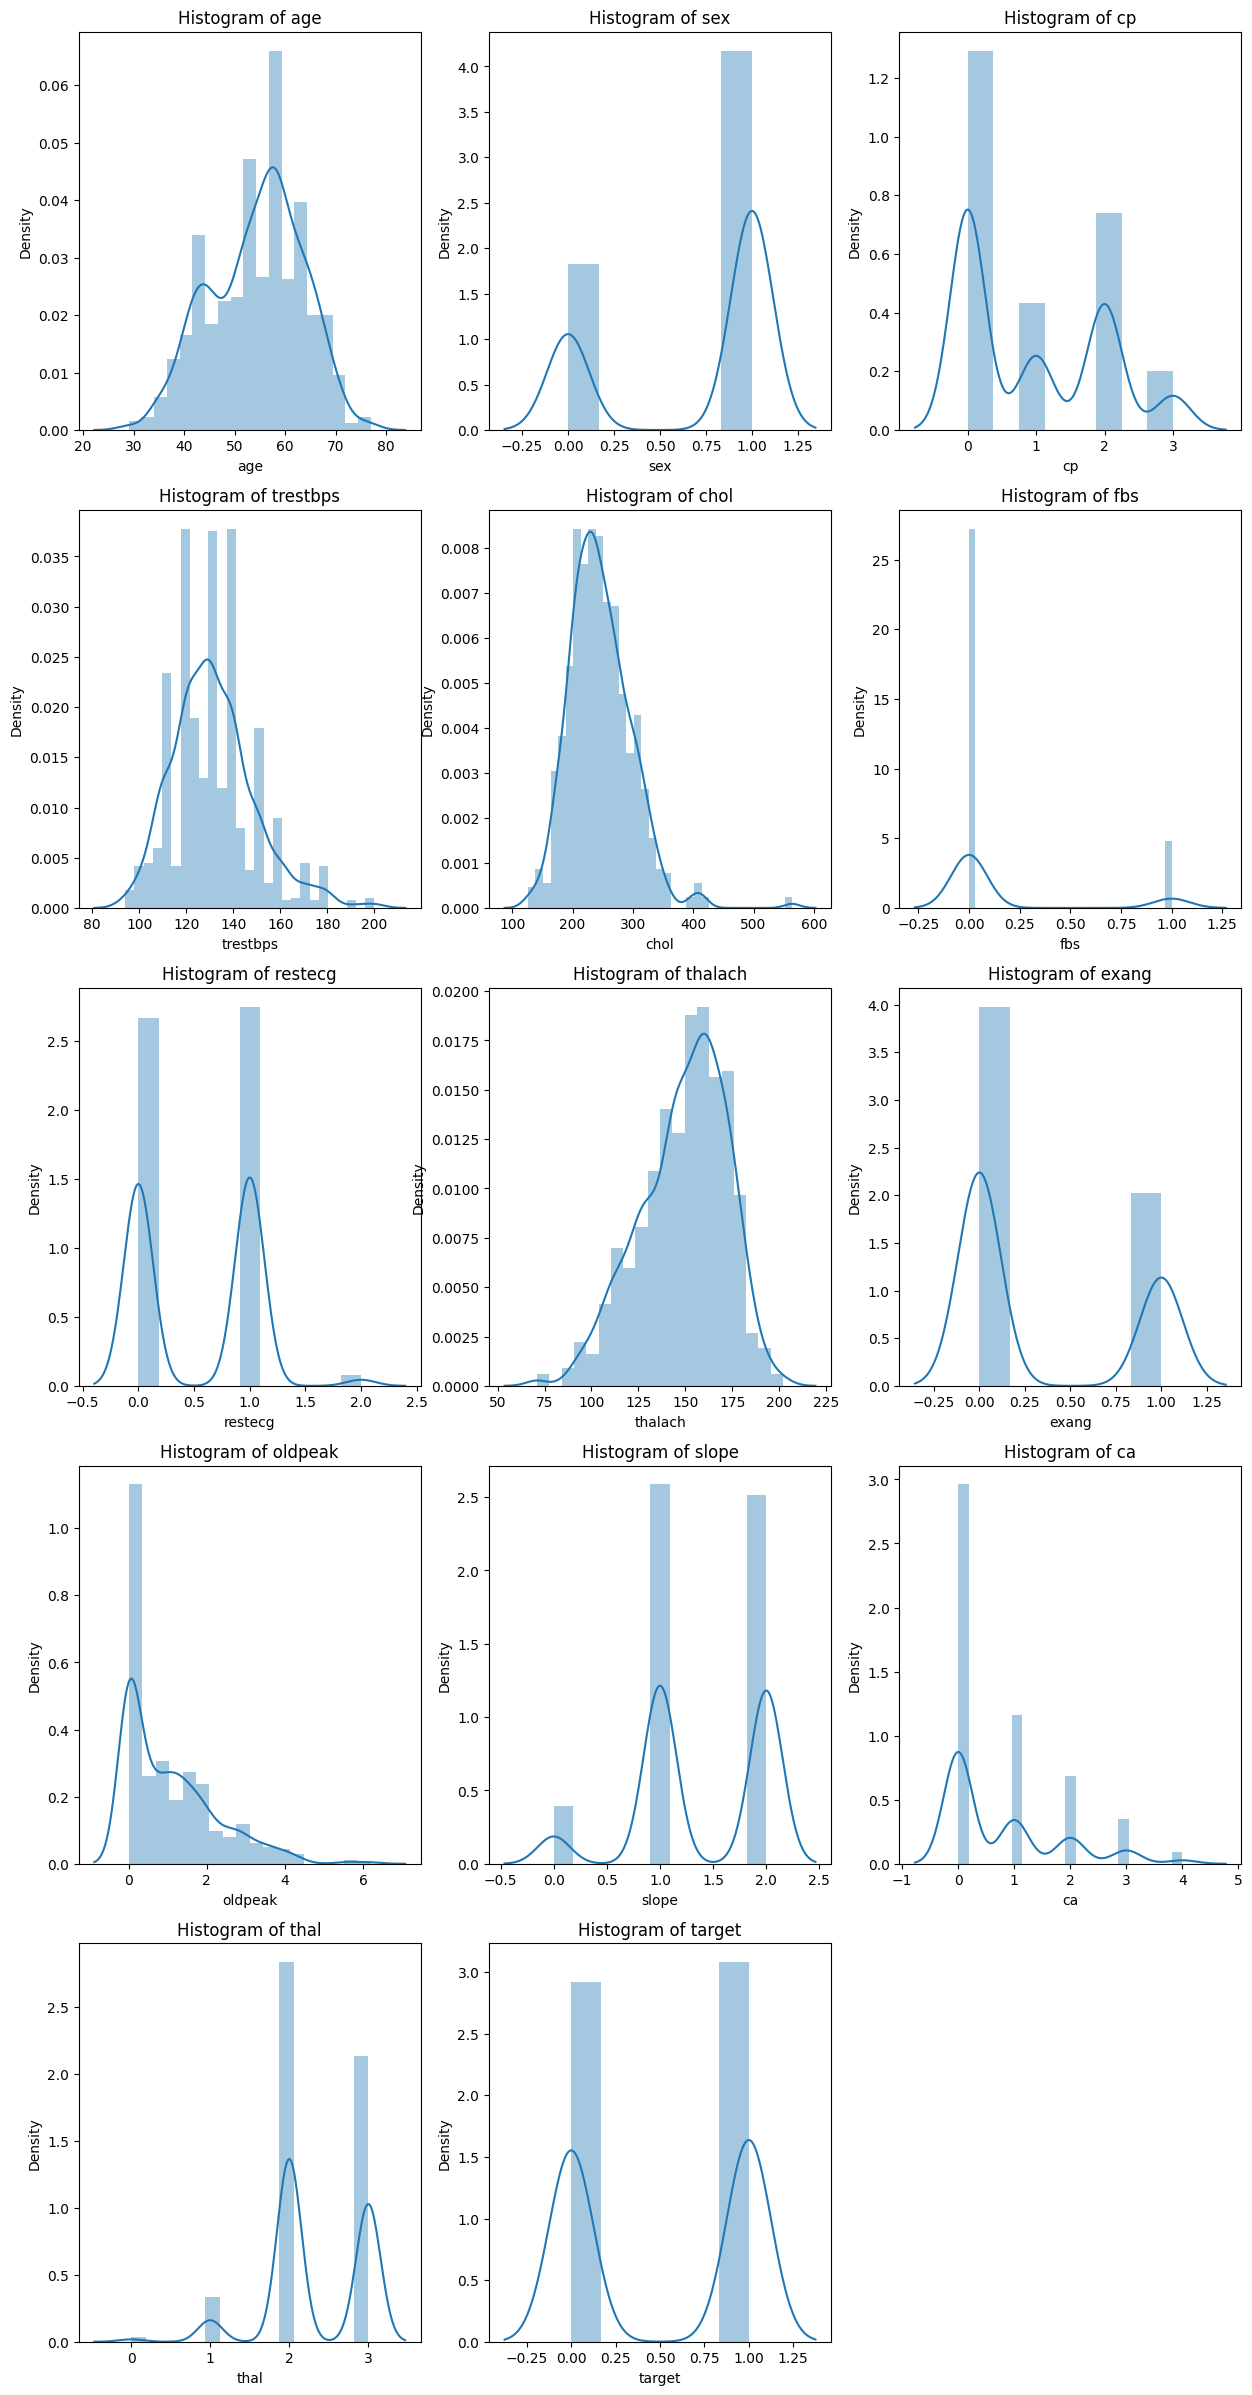

In [12]:
plt.figure(figsize=(15, 30))
i = 1
for column in df.columns:
  if (i <= 14):
    plt.subplot(5, 3, i)
    sns.distplot(df[column])
    plt.title("Histogram of " + column)
    i += 1

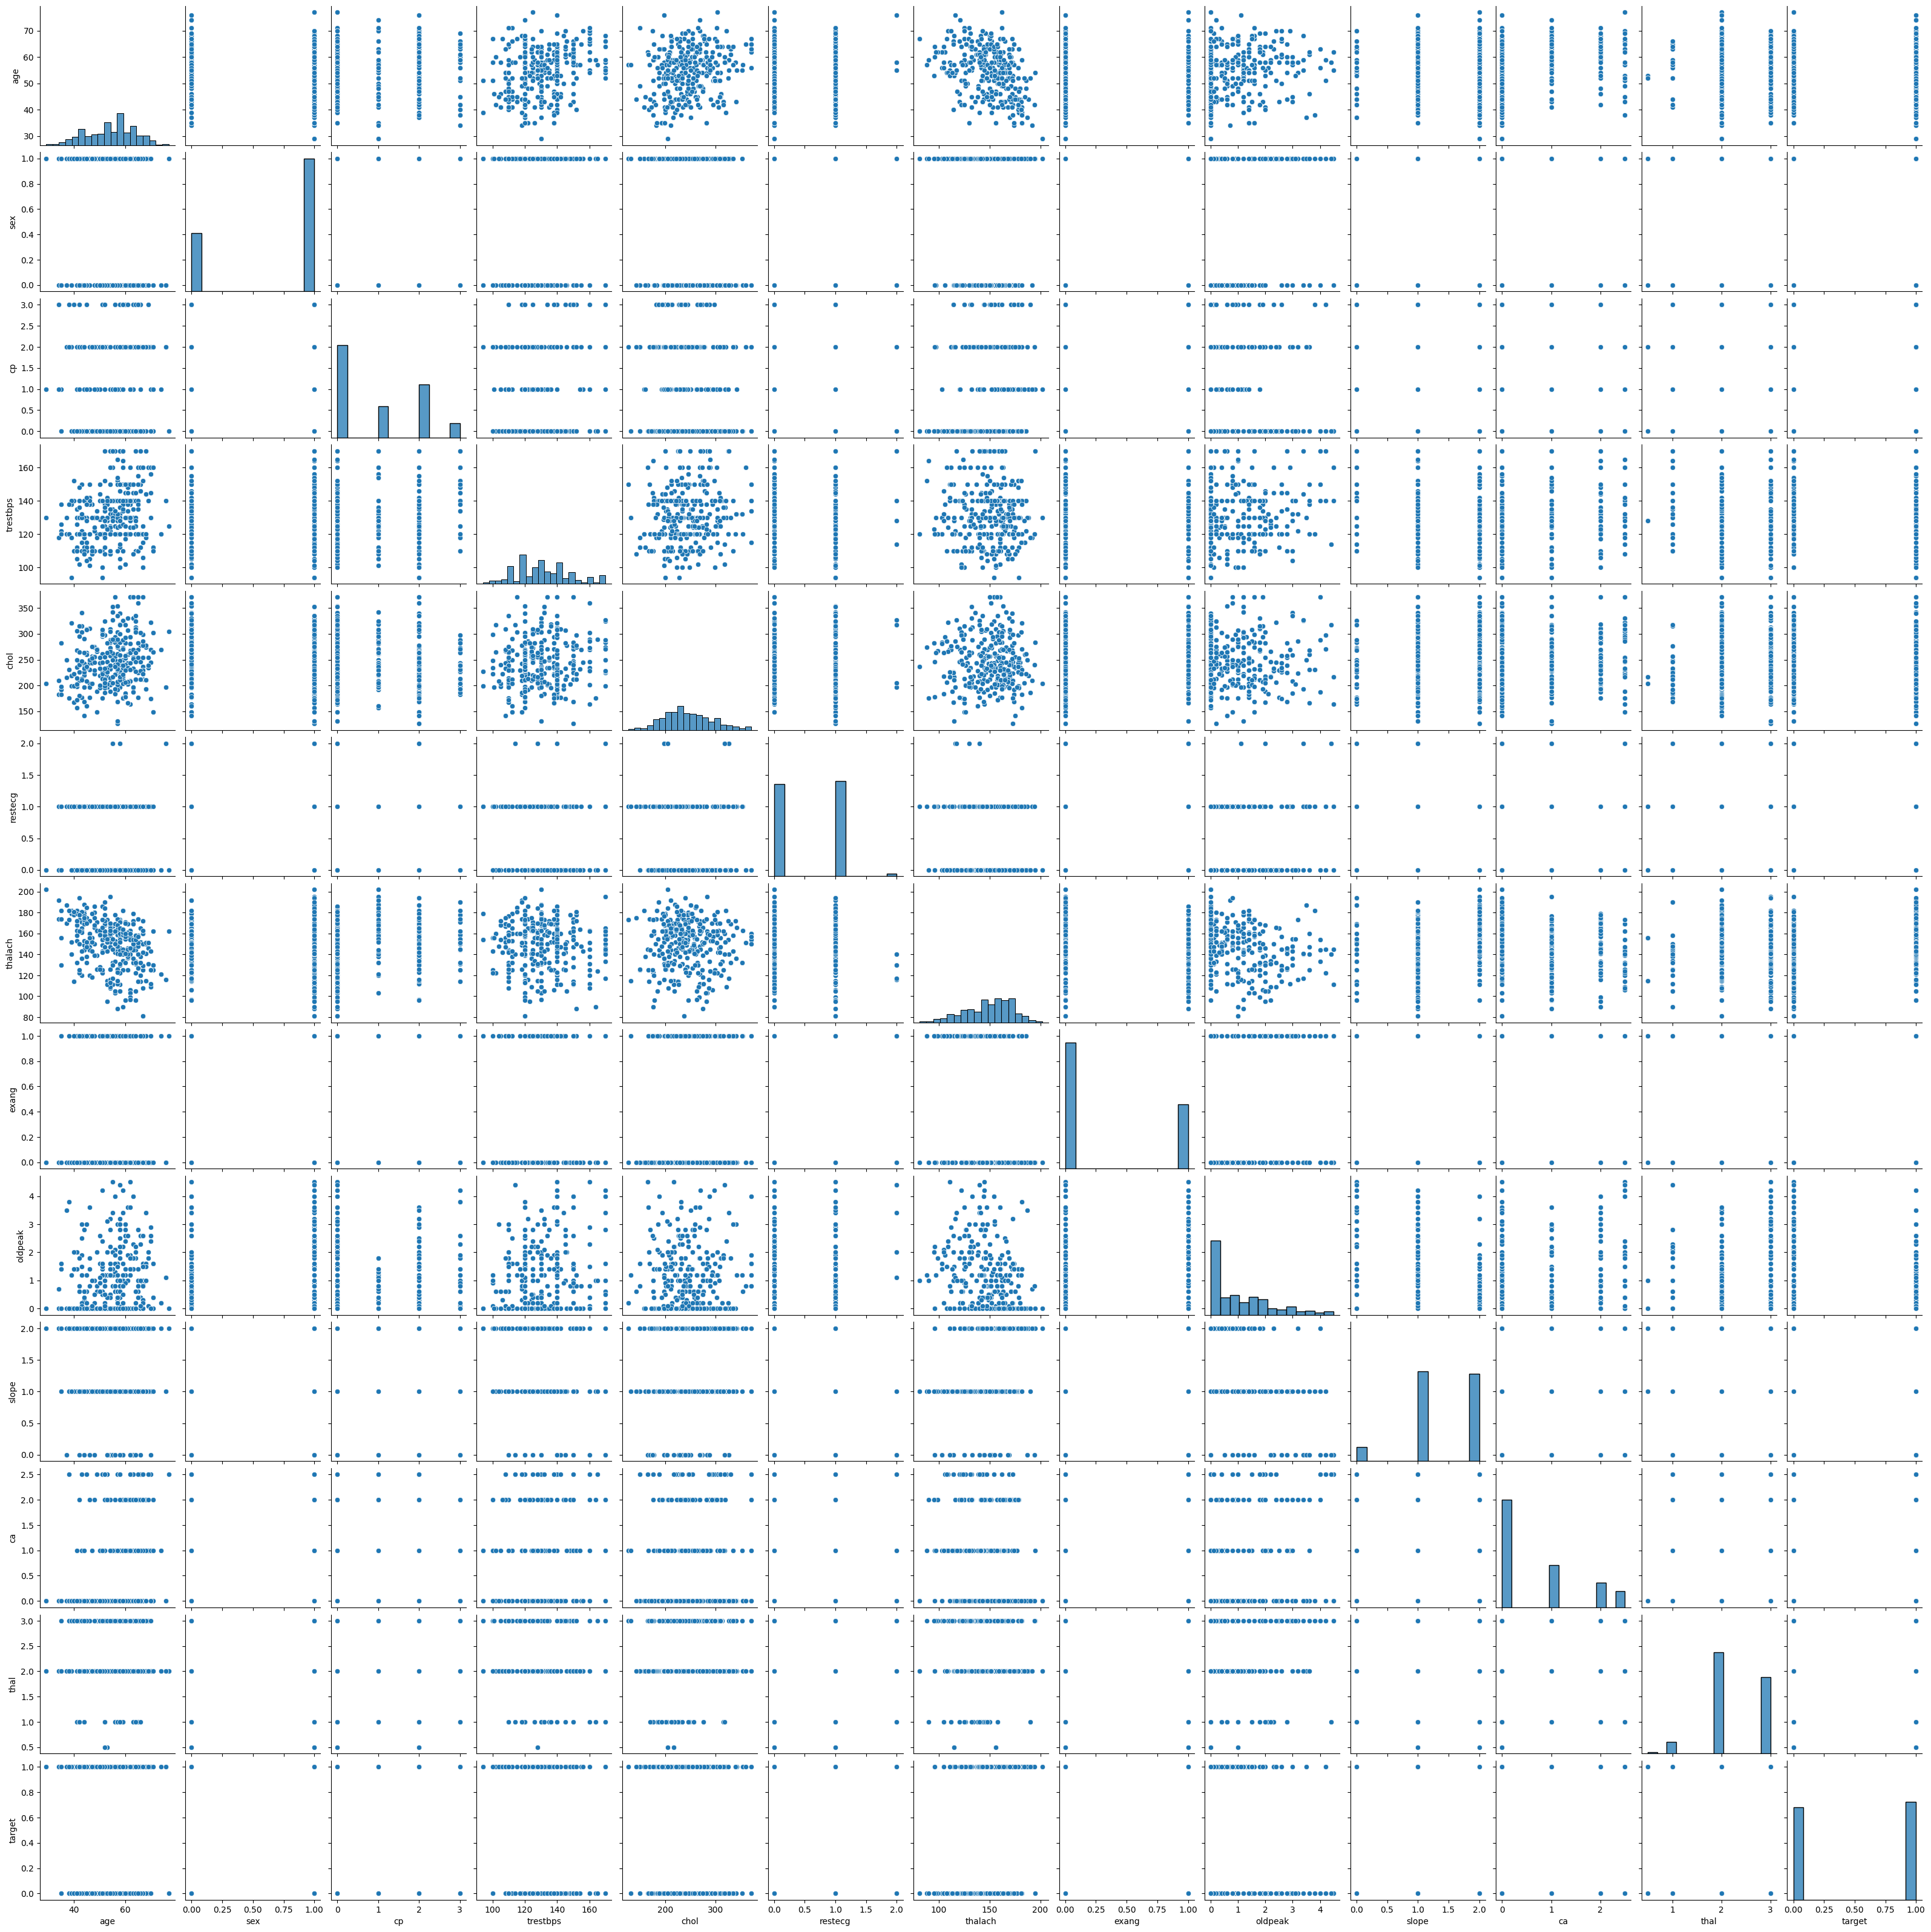

In [117]:
sns.pairplot(df)

## Box Plot of all the columns

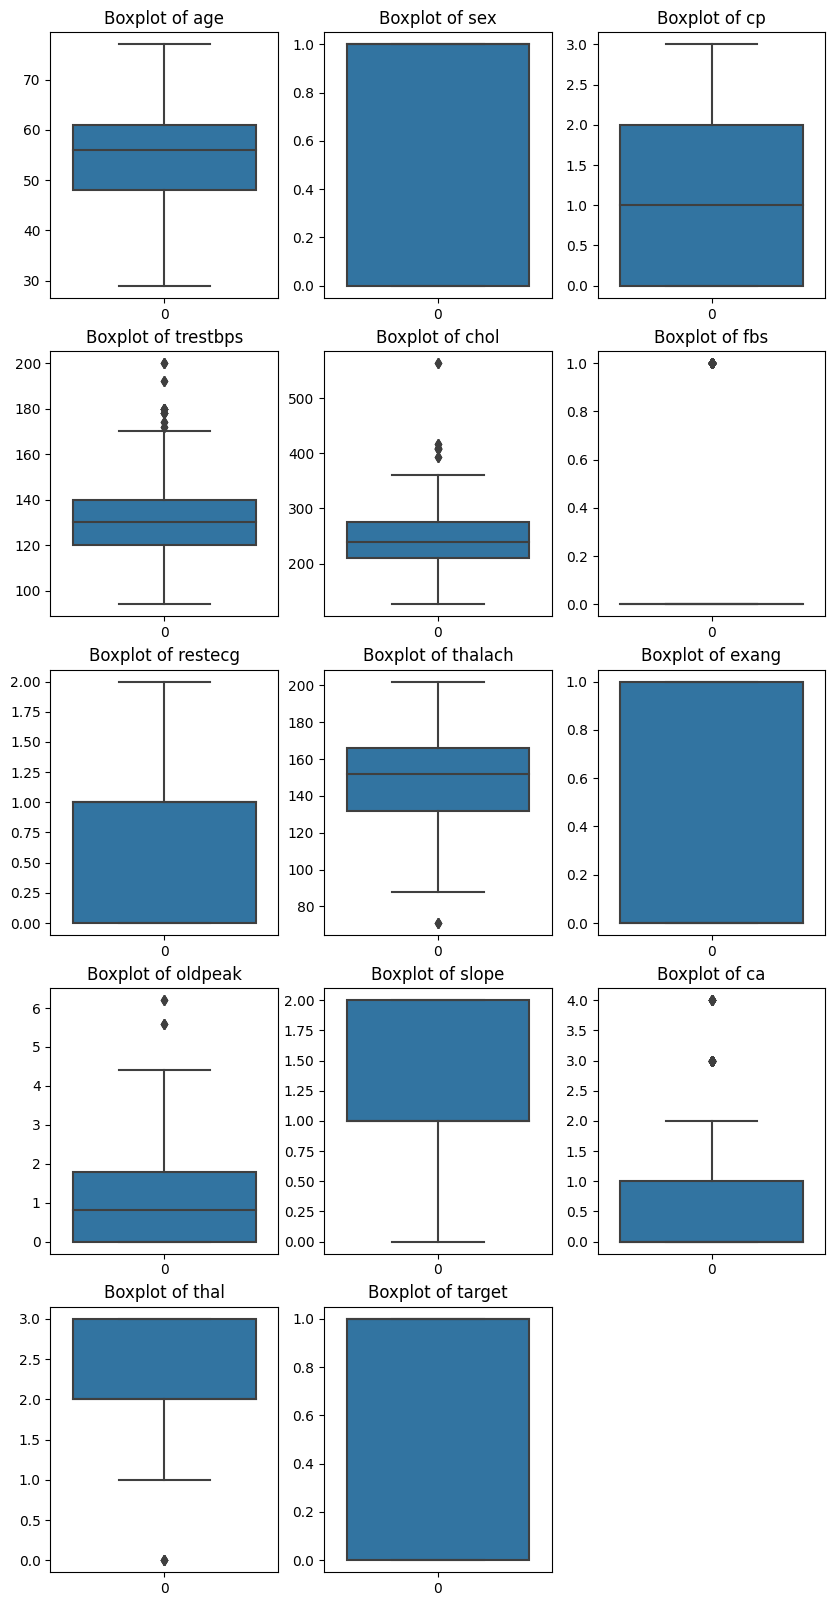

In [13]:
plt.figure(figsize=(10, 20))
i = 1
for column in df.columns:
  if (i <= 14):
    plt.subplot(5, 3, i)
    sns.boxplot(df[column])
    plt.title("Boxplot of " + column)
    i += 1

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [15]:
q1, q3 = np.percentile(df['trestbps'], [25, 75])

In [16]:
q1, q3

(120.0, 140.0)

In [17]:
IQR = q3 - q1

In [18]:
IQR

20.0

In [19]:
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

In [20]:
df[(df['trestbps'] > upper_bound) | (df['trestbps'] < lower_bound)]['trestbps']

29     180
47     178
87     174
137    180
151    192
175    200
229    178
246    192
257    180
294    200
326    192
343    172
396    180
436    174
452    178
496    180
508    200
509    180
528    178
609    180
624    178
636    174
679    180
688    200
837    172
891    180
896    178
944    178
971    172
986    180
Name: trestbps, dtype: int64

In [21]:
def outlier_remover(column):
  q1, q3 = np.percentile(df[column], [25, 75])
  IQR = q3 - q1
  upper_bound = q3 + 1.5 * IQR
  lower_bound = q1 - 1.5 * IQR
  outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)][column]
  df[column] = np.where(df[column] > upper_bound, upper_bound, np.where(df[column] < lower_bound, lower_bound, df[column]))

In [22]:
for column in df.columns:
  outlier_remover(column)

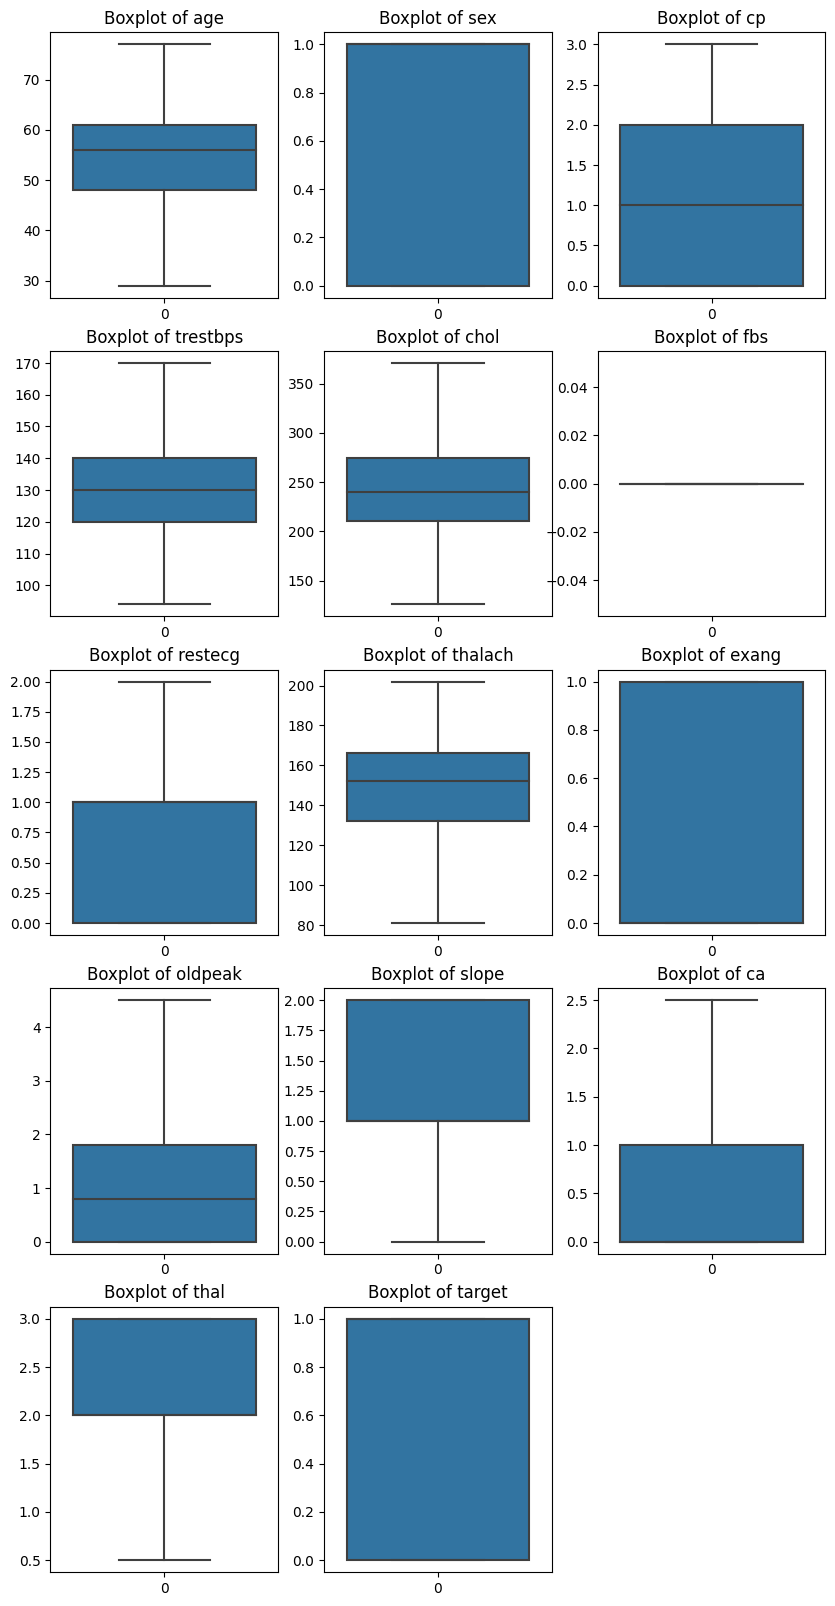

In [23]:
plt.figure(figsize=(10, 20))
i = 1
for column in df.columns:
  if (i <= 14):
    plt.subplot(5, 3, i)
    sns.boxplot(df[column])
    plt.title("Boxplot of " + column)
    i += 1

In [24]:
df = df.drop(['fbs'], axis=1)

<Axes: >

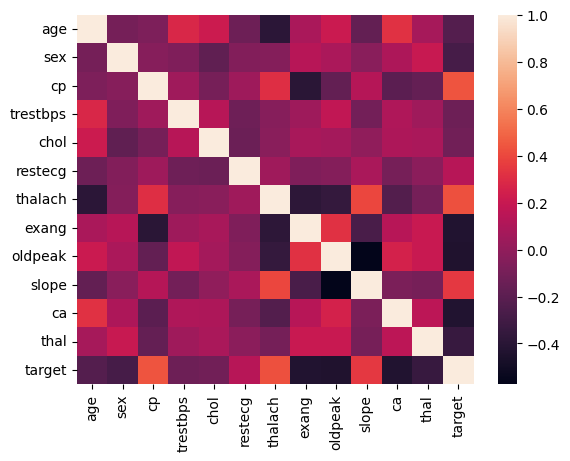

In [25]:
sns.heatmap(df.corr())

In [26]:
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,106.0,0.0,1.9,1.0,2.5,2.0,0.0


<Axes: >

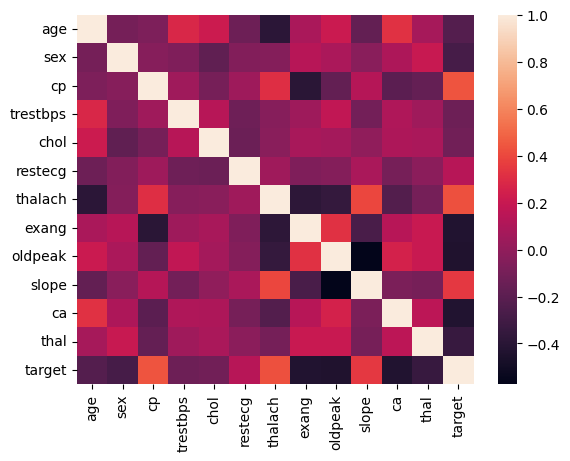

In [27]:
sns.heatmap(df.corr())

In [45]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.1 MB/s eta 0:00:00


In [68]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

In [90]:
df = df.replace('?',np.nan)


In [91]:
df.sample(5)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
965,76.0,0.0,2.0,140.0,197.0,2.0,116.0,0.0,1.1,1.0,0.0,2.0,1.0
607,42.0,1.0,0.0,136.0,315.0,1.0,125.0,1.0,1.8,1.0,0.0,1.0,0.0
261,54.0,1.0,2.0,150.0,232.0,0.0,165.0,0.0,1.6,2.0,0.0,3.0,1.0
7,55.0,1.0,0.0,160.0,289.0,0.0,145.0,1.0,0.8,1.0,1.0,3.0,0.0
170,43.0,1.0,0.0,150.0,247.0,1.0,171.0,0.0,1.5,2.0,0.0,2.0,1.0


In [69]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [102]:
model= BayesianNetwork([('age','target'),('sex','target'),('exang','target'),('cp','target'),('target','restecg'),('target','chol')])

In [103]:
print('\n Learning CPD using Maximum likelihood estimators')
model.fit(df,estimator=MaximumLikelihoodEstimator)


 Learning CPD using Maximum likelihood estimators


In [104]:
print('\n Inferencing with Bayesian Network:')
HeartDisease_infer = VariableElimination(model)


 Inferencing with Bayesian Network:


In [107]:
print('\n 2. Probability of HeartDisease given evidence= cp ')
q2=HeartDiseasetest_infer.query(variables=['target'],evidence={'exang':1.0})
print(q2)


 2. Probability of HeartDisease given evidence= cp 
+-------------+---------------+
| target      |   phi(target) |
+=============+===============+
| target(0.0) |        0.6295 |
+-------------+---------------+
| target(1.0) |        0.3705 |
+-------------+---------------+


In [ ]:
print('\n 2. Probability of HeartDisease given evidence= cp ')
q2=HeartDiseasetest_infer.query(variables=['target'],evidence={'cp':2})
print(q2)

## **Print Conditional Probabilities**

In [106]:
for cpd in model.get_cpds():
    print(cpd)

+-----------+------------+
| age(29.0) | 0.00390244 |
+-----------+------------+
| age(34.0) | 0.00585366 |
+-----------+------------+
| age(35.0) | 0.0146341  |
+-----------+------------+
| age(37.0) | 0.00585366 |
+-----------+------------+
| age(38.0) | 0.0117073  |
+-----------+------------+
| age(39.0) | 0.0136585  |
+-----------+------------+
| age(40.0) | 0.0107317  |
+-----------+------------+
| age(41.0) | 0.0312195  |
+-----------+------------+
| age(42.0) | 0.0253659  |
+-----------+------------+
| age(43.0) | 0.0253659  |
+-----------+------------+
| age(44.0) | 0.035122   |
+-----------+------------+
| age(45.0) | 0.0243902  |
+-----------+------------+
| age(46.0) | 0.022439   |
+-----------+------------+
| age(47.0) | 0.017561   |
+-----------+------------+
| age(48.0) | 0.022439   |
+-----------+------------+
| age(49.0) | 0.0165854  |
+-----------+------------+
| age(50.0) | 0.0204878  |
+-----------+------------+
| age(51.0) | 0.0380488  |
+-----------+------------+
|

In [108]:
!pip install networkx

In [110]:
import networkx as nx

In [111]:
dag = nx.DiGraph(model.edges())

In [112]:
pos = {
    'age': (0, 2),
    'sex': (1, 2),
    'cp': (2, 2),
    'trestbps': (0, 1),
    'chol': (1, 1),
    'fbs': (2, 1),
    'restecg': (0, 0),
    'thalach': (1, 0),
    'exang': (2, 0),
    'oldpeak': (3, 2),
    'slope': (3, 1),
    'ca': (3, 0),
    'thal': (4, 1),
    'target': (5, 1)
}

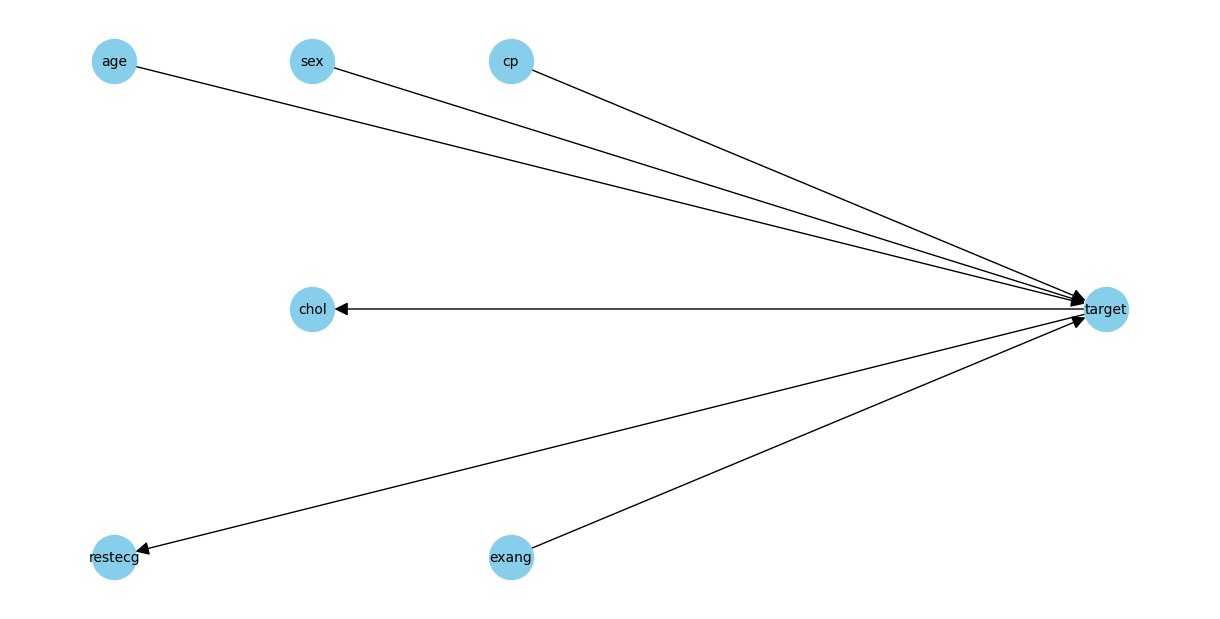

In [113]:
plt.figure(figsize=(12, 6))
nx.draw(dag, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black', arrowsize=20)
